In [1]:
import sys
sys.path.append("/home/ubuntu/mlab/days/w3d3/rl_env/lib/python3.8/site-packages")
sys.path.append("/home/ubuntu/mlab/days/w3d3/rl_env/lib/python3.9/site-packages")

In [2]:
import torch
from torch import nn
import rl_tests
import random
import copy
from collections import deque

In [3]:
import gym
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
from IPython.display import Video
from video_recorder import VideoRecorder

In [4]:
env_name = "CartPole-v1"
record = True
video_name = "test_0"

env = gym.make(env_name)
state = env.reset()
done = False
total_reward = 0

def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(plt.gcf())

states = 0
# Ensure that VideoRecorder is initialized outside
video_recorder = VideoRecorder(env,
    f"videos/{video_name}.mp4"
)    
while not done:
    states += 1
    if record:
        video_recorder.capture_frame()
    else:  
        show_state(env)
    state, reward, done, _ = env.step(env.action_space.sample()) # Take a random action
    # print(f"{reward=}")
    total_reward += reward

print(f"total reward: {total_reward}")
print(f"num steps taken: {states}")
if record:
    video_recorder.close()


total reward: 14.0
num steps taken: 14


In [5]:
# gym.logger.set_level(gym.logger.ERROR)

In [6]:
# Display a saved video 
Video("videos/test_0.mp4")

In [7]:
class QNetwork(torch.nn.Module):
    def __init__(self, in_size: int, hidden_size: int, out_size: int) -> None:
        super().__init__()
        self.mlp = torch.nn.Sequential(
            nn.Linear(in_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, out_size),
        )
    def forward(self, obs: torch.Tensor) -> torch.Tensor:
        """
        Possibly in a batched manner:
            Takes an observation vector (e.g. flattened image),
            outputs a vector of rewards for each action
        """
        return self.mlp(obs)
    
rl_tests.test_q_net(QNetwork)

test_q_net MATCH!!!!!!!!
 SHAPE (16, 63) MEAN: -0.007192 STD: 0.08323 VALS [0.0643 0.1858 0.06097 0.06114 -0.0363 -0.01642 -0.04007 0.01136 -0.004181 -0.02974...]


In [8]:
import torch

def make_choice(env: gym.Env, eps: float, net: nn.Module, 
                obs: torch.Tensor, device: str
            ) -> int:
    batch_size = obs.shape[0]
    # rewards_for_each_action shape: batch_size, num_actions

    rewards_for_each_action = net(obs)
    actions = torch.where(torch.rand(batch_size) < eps, 
                    # TODO: Make this batches
                    torch.tensor([env.action_space.sample() for _ in range(batch_size)], dtype=torch.long), 
                    torch.argmax(rewards_for_each_action, dim=-1))
    # print(f"{obs=}")
    # print(f"{actions=}")
    return actions.to(device)

In [9]:
def evaluate(model: nn.Module, env: gym.Env, eps: float = 0.05, video_name = "test_1") -> float:
    
    state = env.reset()
    done = False
    total_reward = 0

    states = 0
    # Ensure that VideoRecorder is initialized outside
    video_recorder = VideoRecorder(env,
        f"videos/{video_name}.mp4"
    )    
    with torch.no_grad():
        while not done:
            states += 1
            if record:
                video_recorder.capture_frame()
            else:  
                show_state(env)
            # Batch the observation
            obs = torch.tensor(state, dtype=torch.float).unsqueeze(0)
            state, reward, done, _ = env.step(make_choice(env, eps, 
                                                          model, obs, 'cuda:0').item())
            # print(f"{reward=}")
            total_reward += reward

        print(f"total reward: {total_reward}")
        print(f"num steps taken: {states}")
        if record:
            video_recorder.close()
    return total_reward


In [10]:
    """
    https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py
    Description:
        A pole is attached by an un-actuated joint to a cart, which moves along
        a frictionless track. The pendulum starts upright, and the goal is to
        prevent it from falling over by increasing and reducing the cart's
        velocity.
    Source:
        This environment corresponds to the version of the cart-pole problem
        described by Barto, Sutton, and Anderson
    Observation:
        Type: Box(4)
        Num     Observation               Min                     Max
        0       Cart Position             -2.4                    2.4
        1       Cart Velocity             -Inf                    Inf
        2       Pole Angle                -0.209 rad (-12 deg)    0.209 rad (12 deg)
        3       Pole Angular Velocity     -Inf                    Inf
    Actions:
        Type: Discrete(2)
        Num   Action
        0     Push cart to the left
        1     Push cart to the right
        Note: The amount the velocity that is reduced or increased is not
        fixed; it depends on the angle the pole is pointing. This is because
        the center of gravity of the pole increases the amount of energy needed
        to move the cart underneath it
    Reward:
        Reward is 1 for every step taken, including the termination step
    Starting State:
        All observations are assigned a uniform random value in [-0.05..0.05]
    Episode Termination:
        Pole Angle is more than 12 degrees.
        Cart Position is more than 2.4 (center of the cart reaches the edge of
        the display).
        Episode length is greater than 200.
        Solved Requirements:
        Considered solved when the average return is greater than or equal to
        195.0 over 100 consecutive trials.
    """
pass

In [11]:
record = True

In [20]:
dir(env.env)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_pole_geom',
 'action_space',
 'axle',
 'carttrans',
 'close',
 'force_mag',
 'gravity',
 'kinematics_integrator',
 'length',
 'masscart',
 'masspole',
 'metadata',
 'np_random',
 'observation_space',
 'polemass_length',
 'poletrans',
 'render',
 'reset',
 'reward_range',
 'seed',
 'spec',
 'state',
 'step',
 'steps_beyond_done',
 'tau',
 'theta_threshold_radians',
 'total_mass',
 'track',
 'unwrapped',
 'viewer',
 'x_threshold']

In [14]:
from tqdm import tqdm

In [16]:
# FIXME: Currently hangs after ~700 episodes. Did it get really good on at infinite horizon task?
# Try changing num steps per episode if possible, or try a different (limited horizon) task like MountainCar???
#  CartPole-v1 seems to have 475/500 max episode length: https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py

from collections import deque

num_observations = env.observation_space.shape[0]
num_actions = env.action_space.n
qnetwork = QNetwork(num_observations, 64, num_actions)


def train(q: nn.Module, env: gym.Env, episodes: int = 2000, eps: float = 0.05, max_buffer_size=10000, discount=0.98,
          train_freq=16, batch_size=128, lr=1e-3, steps=20000, video_name="train_0") -> float:
    # (observation, action, reward, done)
    # We can index into next_observation: if current observation is at index i then the next observation is at index i+1
    buffer = deque()

    num_steps_taken = 0
    check_for_training = 10000

    frozen_q = copy.deepcopy(q)
    frozen_q.eval()
    q.train()
    optimizer = torch.optim.Adam(q.parameters(), lr=lr)

    # # Ensure that VideoRecorder is initialized outside
    # video_recorder = VideoRecorder(env,
    #                                f"videos/{video_name}.mp4"
    #                                )

    for episode in tqdm(range(episodes)):
        cur_state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            num_steps_taken += 1

            # Commenting out these to speed up execution
            # if record:
            #     video_recorder.capture_frame()
            # else:
            #     show_state(env)

            # Batch the observation
            cur_state = torch.tensor(cur_state, dtype=torch.float).unsqueeze(0)  # This shouldn't throw an error, cur_state shouldn't have been tensor earlier
            action = make_choice(env, eps, q, cur_state, 'cuda:0').item()
            new_state, reward, done, _ = env.step(action)

            # If buffer is full, take oldest time out
            if len(buffer) == max_buffer_size:
                buffer.popleft()
            buffer.append((cur_state, action, reward, done))

            cur_state = new_state
            episode_reward += reward

            if num_steps_taken % train_freq == 0 and num_steps_taken > batch_size:
                # train_freq += 1

                # Get sample indices
                # Doing a len(buffer) - 1 so there's always a next sample
                buffer_size = len(buffer)
                buffer_indices = random.sample(range(buffer_size - 1), batch_size)

                optimizer.zero_grad()
                loss = 0

                for index in buffer_indices:
                    # FIXME: cur_state, new_state (maybe other variables) overwrites outer scope variables!
                    #  Change the variable names here

                    state0, action0, reward0, done0 = buffer[index]
                    state1, _, _, _ = buffer[index + 1]

                    with torch.no_grad():
                        # If we have no next state, then we can't do a max over the Q function
                        # So we resort to taking the reward
                        if done0:
                            target = reward0
                        else:
                            next_return = torch.max(frozen_q(state1))
                            # print(f"{next_return=}")
                            target = reward0 + discount * next_return.item()

                    # print(f"{q(state0)=}")
                    # Get first batch of action rewards
                    # FIXME: `predicted = q(state0)[0][action0]` returns an index out of bounds error sometimes :(
                    #  probably due to the variable name repeats/confusion above
                    predicted = q(state0).squeeze()[action0]
                    # print(f"{target=}")
                    # print(f"{predicted=}")
                    loss += (target - predicted) ** 2

                loss /= batch_size
                # loss = torch.autograd.Variable(loss, requires_grad = True)
                loss.backward()
                optimizer.step()

                # Update frozen Q network
                frozen_q.load_state_dict(q.state_dict())
                # print(f"{q.mlp[0].weight[0,0].item()=}")
                # print(f"{frozen_q.mlp[0].weight[0,0].item()=}")

        if episode % 100 == 0:
            print(f"episode {episode} reward: {episode_reward}")
            print(f"num steps taken: {num_steps_taken}")
        if num_steps_taken >= steps:
            break
        if num_steps_taken % check_for_training == 0:
            print("evaluating agent")
            evaluate(frozen_q, env, eps=0, video_name=f"training_checkpoint_{num_steps_taken}")

    # if record:
    #     video_recorder.close()


train(qnetwork, env)

  0%|                                                                                              | 0/2000 [00:00<?, ?it/s]

episode 0 reward: 10.0
num steps taken: 10


  5%|████▍                                                                               | 105/2000 [00:03<00:57, 33.11it/s]

episode 100 reward: 10.0
num steps taken: 990


 10%|████████▍                                                                           | 202/2000 [00:08<01:30, 19.90it/s]

episode 200 reward: 9.0
num steps taken: 1944


 15%|████████████▋                                                                       | 303/2000 [00:13<01:31, 18.64it/s]

episode 300 reward: 9.0
num steps taken: 2927


 20%|█████████████████                                                                   | 406/2000 [00:18<00:58, 27.08it/s]

episode 400 reward: 9.0
num steps taken: 4250


 25%|█████████████████████▏                                                              | 504/2000 [00:22<01:02, 23.80it/s]

episode 500 reward: 17.0
num steps taken: 5639


 30%|█████████████████████████▏                                                          | 601/2000 [00:42<05:53,  3.96it/s]

episode 600 reward: 37.0
num steps taken: 9846


 34%|████████████████████████████▍                                                       | 678/2000 [01:29<02:53,  7.60it/s]


In [ ]:
%time qnetwork.load_state_dict(qnetwork.state_dict())

In [ ]:
qnetwork.training

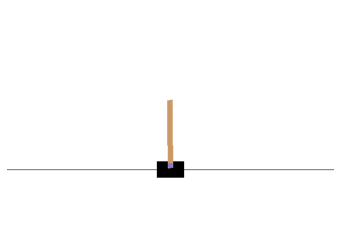

tensor(0.9384)
tensor(1.9111)
tensor(3.4584)
tensor(4.4062)
tensor(5.3788)
tensor(6.3297)
tensor(7.2892)
tensor(8.2220)
tensor(9.1800)
tensor(10.6812)
tensor(11.6546)
tensor(12.6058)
tensor(13.5720)
tensor(14.5386)
tensor(15.4715)
tensor(16.4167)
tensor(17.3674)
tensor(18.3295)
tensor(19.2849)
tensor(20.2167)
tensor(21.1857)
tensor(22.1452)
tensor(23.1172)
tensor(24.0810)
tensor(25.0512)
tensor(26.0041)
tensor(26.9380)
tensor(28.3819)
tensor(29.3523)
tensor(30.3256)
tensor(31.3010)
tensor(32.2751)
tensor(33.2458)
tensor(34.2062)
tensor(35.1375)
tensor(36.1042)
tensor(37.0766)
tensor(38.0101)
tensor(38.9422)
tensor(39.8990)
tensor(40.8381)
tensor(41.7828)
tensor(42.7556)
tensor(43.7280)
tensor(44.6630)
tensor(45.6255)
tensor(46.5844)
tensor(47.5563)
tensor(48.5146)
tensor(49.9904)
tensor(50.9570)
tensor(51.9220)
tensor(52.8846)
tensor(54.4310)
tensor(55.3993)
tensor(56.8978)
tensor(57.8704)
tensor(58.8045)
tensor(59.7439)
tensor(61.2917)
tensor(62.2496)
tensor(63.1893)
tensor(64.1497)
t

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

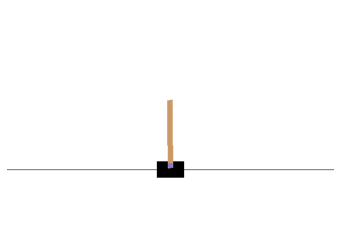

In [55]:
%time train(qnetwork, env, episodes=3000)

In [ ]:
qnetwork.mlp[0].weight[0,0]

tensor(-0.1145, grad_fn=<SelectBackward0>)

In [ ]:
# Let's train the QNetwork from the buffer
buffer_indices  = random.random_indices(num_samples, (0, buf_size-1))
obs, action, reward, done = buffer[i]
next_obs, _, _, _ = buffer[i+1]

deque([])